<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР 3, вариант 10 


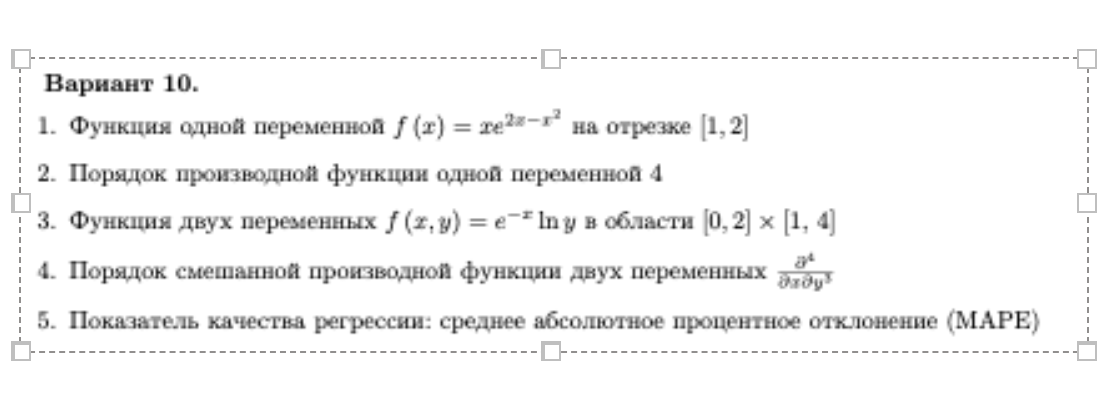

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1.    Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2.    Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3.    Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4.    Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5.    Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6.    Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7.    Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8.    Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math. 

9.    Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

# __Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции. xe^(2x-x^2) [1,2]__

In [219]:
import tensorflow as tf
import numpy as np
import random
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  f = f(x)

f

<tf.Tensor: shape=(1, 102), dtype=float32, numpy=
array([[2.7182817, 2.7351754, 2.7560375, 2.7845304, 2.812891 , 2.863382 ,
        2.868246 , 2.887875 , 2.923141 , 2.931214 , 3.0520763, 3.0533686,
        3.087818 , 3.091174 , 3.1274445, 3.1306894, 3.1316478, 3.168882 ,
        3.1779609, 3.1854837, 3.1857307, 3.192272 , 3.1947904, 3.2046518,
        3.205649 , 3.2165506, 3.2201934, 3.2240975, 3.2336469, 3.2428699,
        3.246136 , 3.2468367, 3.2470374, 3.2476177, 3.2455044, 3.2442753,
        3.2305365, 3.2279253, 3.2269819, 3.2124538, 3.2111065, 3.2110195,
        3.2109616, 3.2106102, 3.2072573, 3.173541 , 3.1710403, 3.1637485,
        3.1628835, 3.1591244, 3.1550484, 3.1511827, 3.1472082, 3.1420753,
        3.130404 , 3.117811 , 3.1099844, 3.092947 , 3.0775805, 3.0374894,
        3.0313475, 3.0141907, 3.0077002, 2.9955747, 2.9842315, 2.9807518,
        2.9563503, 2.9496725, 2.9458816, 2.894335 , 2.8545828, 2.8496044,
        2.8461657, 2.722268 , 2.721725 , 2.6825047, 2.668158 ,

In [220]:
maxx=tf.reduce_max(f)
maxx

<tf.Tensor: shape=(), dtype=float32, numpy=3.2476177>

In [221]:
minn=tf.reduce_min(f)
minn

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# __Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.__



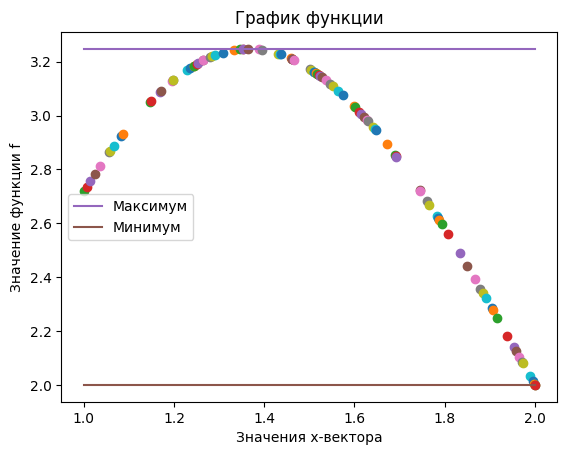

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, f)
ax.plot(x.numpy(), f.numpy(), 'o')
# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 2], [maxx, maxx], label='Максимум')
ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функции f')
ax.set_title('График функции')
ax.legend()
plt.show()

# __Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.__

порядок - 4

In [223]:
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape1:
  tape1.watch(x)
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape3:
      tape3.watch(x)
      with tf.GradientTape(persistent=True) as tape4:  
        tape4.watch(x)
        f = f(x)
      dydx = tape4.gradient(f, x)    
    d2ydx2 =tape3.gradient(dydx, x)  
  d3ydx3=tape2.gradient(d2ydx2, x) 
d4ydx4 =tape1.gradient(d3ydx3, x)  

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)
print('d3y/dx3 =', d3ydx3)
print('d4y/dx4 =', d4ydx4)


dy/dx = tf.Tensor(
[[ 2.7182817   2.6458702   2.637569    2.59853     2.5260143   2.4590168
   2.1865685   2.0948699   2.068046    2.003243    1.8959522   1.8340487
   1.7996659   1.7571626   1.7504296   1.7097473   1.5367002   1.5240335
   1.4775057   1.3945651   1.3761597   1.3401971   1.0871029   0.9551077
   0.92270756  0.84217215  0.53222275  0.41808987  0.27797794  0.21180534
   0.10048389  0.09466124 -0.01430178 -0.07010031 -0.23777533 -0.3635726
  -0.37567616 -0.38321257 -0.4635892  -0.46376896 -0.48235178 -0.5315385
  -0.5556359  -0.6592841  -0.69225836 -0.7222681  -0.76728535 -0.7678323
  -0.867291   -0.91608095 -0.97346306 -1.1471167  -1.4100266  -1.5456882
  -1.5551581  -1.6286173  -1.641242   -1.6508274  -1.6869884  -1.6907258
  -1.7153082  -1.7216201  -1.7983088  -1.9323587  -2.009385   -2.0478048
  -2.1596007  -2.2702103  -2.2823758  -2.3006067  -2.3074741  -2.3206148
  -2.5313978  -2.5994358  -2.6017818  -2.6391783  -2.642551   -2.6611853
  -2.6676798  -2.728558   -2.75

похоже на правду, я проверила вручную

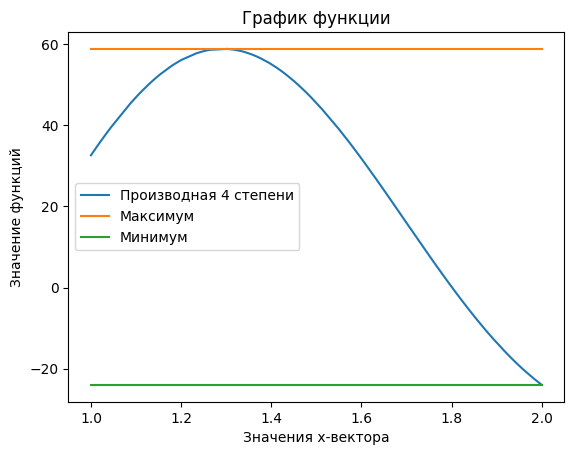

In [233]:
maxx = tf.reduce_max(d4ydx4)
minn = tf.reduce_min(d4ydx4)
x = tf.reshape(x, (-1, 1))
d4ydx4 = tf.reshape(d4ydx4, (-1, 1))
fig, ax = plt.subplots()

line_down = ax.plot(x, d4ydx4.numpy(), label = 'Производная 4 степени')


# Добавляем прямые, соответствующие максимальному и минимальному значению функции
a=ax.plot([1, 2], [maxx, maxx], label='Максимум')
b=ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функций')
ax.set_title('График функции')
ax.legend()

In [56]:
del tape

# __Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.  [0,2][1,4]__

In [57]:
x=np.random.uniform(0, 2, [1, 70])
y=np.random.uniform(1, 4, [1, 70])
x=np.append(x,[0,2])
y=np.append(y,[1,4])
x.sort()
y.sort()
x = tf.constant([x], dtype=tf.float32)
y = tf.constant([y], dtype=tf.float32)
x, y = tf.meshgrid(x, y)
@tf.function
def f(x,y):
    return tf.exp(-x)*tf.math.log(y)


In [58]:
tf.reduce_max(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [59]:
tf.reduce_min(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# __Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.__

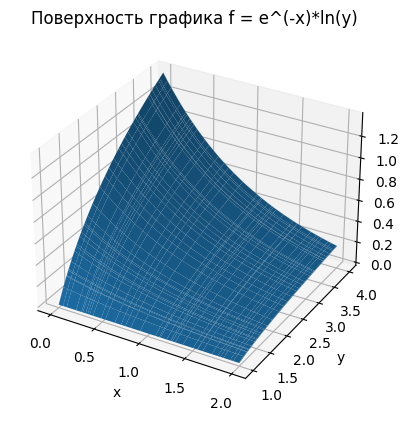

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f(x,y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y)')
plt.show()

# __Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.__
d4/dxdy3

In [61]:
with tf.GradientTape(persistent=True) as tape4:
  tape4.watch(y)
  with tf.GradientTape(persistent=True) as tape3:
    tape3.watch(y)
    with tf.GradientTape(persistent=True) as tape2:
      tape2.watch(y)
      with tf.GradientTape(persistent=True) as tape1:
        tape1.watch(x)
        f=f(x,y)
      dfdx = tape1.gradient(f, x)
    dfdxdy = tape2.gradient(dfdx, y)
  dfdxdy2 = tape3.gradient(dfdxdy, y)
dfdxdy3 = tape4.gradient(dfdxdy2, y)
dfdxdy3

<tf.Tensor: shape=(72, 72), dtype=float32, numpy=
array([[-1.9999996 , -1.9681146 , -1.9033296 , ..., -0.276743  ,
        -0.27203575, -0.2706705 ],
       [-1.3858539 , -1.36376   , -1.3188686 , ..., -0.19176272,
        -0.18850094, -0.18755493],
       [-1.3598601 , -1.3381804 , -1.2941312 , ..., -0.1881659 ,
        -0.18496531, -0.18403703],
       ...,
       [-0.03159567, -0.03109196, -0.0300685 , ..., -0.00437194,
        -0.00429758, -0.00427601],
       [-0.03132477, -0.03082537, -0.02981069, ..., -0.00433446,
        -0.00426073, -0.00423935],
       [-0.03124999, -0.03075179, -0.02973953, ..., -0.00432411,
        -0.00425056, -0.00422923]], dtype=float32)>

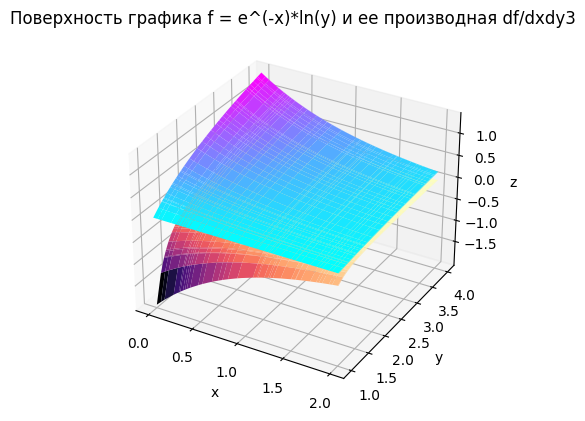

In [62]:

# Plot the surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f.numpy(), cmap='cool')
ax.plot_surface(x, y, dfdxdy3.numpy(), cmap='magma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y) и ее производная df/dxdy3')
plt.show()

In [63]:
del tape1
del tape2
del tape3
del tape4

# __Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.__
mape

In [146]:

x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x_train = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x_train)
  y_train = f(x_train)


In [147]:
def mape(y_test, pred):
   
    mape = tf.reduce_mean(tf.abs((y_test - pred) / y_test))
    return mape

In [148]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = mape(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [207]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(tf.constant(-0.75))
    self.b = tf.Variable(tf.constant(3.825))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [208]:
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.4)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))
  

Эпоха  0: w=-0.75 b=3.83, потери=0.14900
Эпоха  1: w=-0.61 b=3.91, потери=0.11097
Эпоха  2: w=-0.59 b=3.91, потери=0.11052
Эпоха  3: w=-0.59 b=3.90, потери=0.11032
Эпоха  4: w=-0.58 b=3.89, потери=0.11013
Эпоха  5: w=-0.58 b=3.88, потери=0.10994
Эпоха  6: w=-0.57 b=3.88, потери=0.10976
Эпоха  7: w=-0.57 b=3.87, потери=0.10958
Эпоха  8: w=-0.56 b=3.86, потери=0.10940
Эпоха  9: w=-0.56 b=3.86, потери=0.10922
Эпоха 10: w=-0.55 b=3.85, потери=0.10905
Эпоха 11: w=-0.55 b=3.84, потери=0.10889
Эпоха 12: w=-0.55 b=3.84, потери=0.10873
Эпоха 13: w=-0.54 b=3.83, потери=0.10857
Эпоха 14: w=-0.54 b=3.82, потери=0.10841
Эпоха 15: w=-0.53 b=3.82, потери=0.10826
Эпоха 16: w=-0.53 b=3.81, потери=0.10811
Эпоха 17: w=-0.52 b=3.80, потери=0.10797
Эпоха 18: w=-0.52 b=3.80, потери=0.10782
Эпоха 19: w=-0.52 b=3.79, потери=0.10768
Эпоха 20: w=-0.51 b=3.78, потери=0.10754
Эпоха 21: w=-0.51 b=3.78, потери=0.10741
Эпоха 22: w=-0.50 b=3.77, потери=0.10728
Эпоха 23: w=-0.50 b=3.77, потери=0.10715
Эпоха 24: w=-0.5

# __Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.__

In [216]:
def plot_learning_curve(losses):
    plt.plot(losses, label='looses')
    plt.title('mape на каждой эпохе')
    plt.xlabel('Эпоха')
    plt.ylabel('mape')
    plt.legend()
    plt.show()

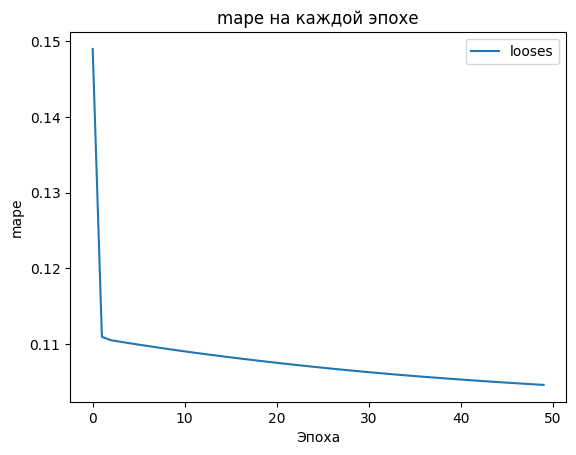

In [217]:
plot_learning_curve(losses)

# __Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.__

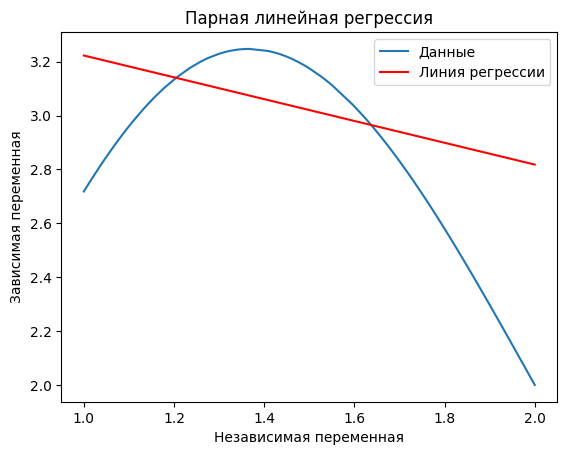

In [235]:
y_pred = model(x_train)
x_train = tf.reshape(x_train, (-1, 1))
y_train = tf.reshape(y_train, (-1, 1))
plt.plot(x_train, y_train, label='Данные')
plt.plot(x_train, y_pred, label='Линия регрессии', color='r')
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('Парная линейная регрессия')
plt.legend()
plt.show()